In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv


In [10]:
import re

In [22]:
df = pd.read_csv('/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [3]:
df.shape

(20000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum() # check for missing values

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,post_id,user_id,followers,friends,favourites,statuses,retweets,label
count,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,6.874728e+17,3.548623e+16,900.483950,782.428750,6398.235550,4.439442e+04,1437.927300,0.500000
std,5773.647028,1.708396e+17,1.606083e+17,1899.913961,1834.817945,8393.072914,1.407785e+05,15119.665118,0.500013
min,0.000000,3.555966e+09,1.472438e+07,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,4999.750000,5.931686e+17,3.242944e+08,177.000000,211.000000,243.000000,5.129000e+03,0.000000,0.000000
50%,9999.500000,7.637400e+17,1.052122e+09,476.000000,561.000000,2752.000000,1.325100e+04,0.000000,0.500000
75%,14999.250000,8.153124e+17,2.285923e+09,1197.000000,701.000000,8229.000000,5.289200e+04,1.000000,1.000000
max,19999.000000,8.194574e+17,7.631825e+17,28614.000000,28514.000000,39008.000000,1.063601e+06,839540.000000,1.000000


In [7]:
df["label"].unique()

array([1, 0])

In [28]:
# keep only the required columns
text_df = df[['post_text']]
text_df.head()

,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


In [30]:
text_df.loc[:, "post_text"] = text_df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove numbers from tweets
text_df.loc[:, "post_text"] = text_df["post_text"].str.replace("\d", "", regex=True)

# Remove punctuation from tweets
text_df.loc[:, "post_text"] = text_df["post_text"].str.replace("[^\w\s]", "", regex=True)


text_df.head()

,post_text
0,its just over years since i was diagnosed wit...
1,its sunday i need a break so im planning to sp...
2,awake but tired i need to sleep but my brain h...
3,rt sewhq retro bears make perfect gifts and ar...
4,its hard to say whether packing lists are maki...


Import TextBlob and NLTK (Natural Language Toolkit) which are used for natural language processing (NLP) tasks.

**TextBlob** provides a more user-friendly API for common NLP tasks such as **sentiment analysis, part-of-speech tagging, and text classification**.

**NLTK** provides a wide range of functionalities for tasks such as tokenization, stemming, lemmatization, parsing, and more. It also includes a vast array of corpora and datasets for language modeling and machine learning.

In [32]:
!pip install textblob

In [34]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import nltk

In [36]:

nltk.download("stopwords")
sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
text_df.loc[:, "post_text"] = text_df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [38]:
text_df.head()

,post_text
0,years since diagnosed anxiety depression today...
1,sunday need break im planning spend little tim...
2,awake tired need sleep brain ideas
3,rt sewhq retro bears make perfect gifts great ...
4,hard say whether packing lists making life eas...


In [39]:
# Lemmatization (to group similar words together)
from textblob import Word

nltk.download("wordnet")
nltk.download("omw-1.4")

text_df.loc[:, "post_text"]  = text_df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [40]:
text_df.head()

,post_text
0,years since diagnosed anxiety depression today...
1,sunday need break im planning spend little tim...
2,awake tired need sleep brain ideas
3,rt sewhq retro bears make perfect gifts great ...
4,hard say whether packing lists making life eas...


In [42]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /usr/share/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [44]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [45]:
from nltk.tokenize import word_tokenize

# tokenize each word
nltk.download('punkt')
text_df.loc[:, "post_text"] = text_df["post_text"].apply(lambda x: TextBlob(x).words)

text_df.head()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,post_text
0,"[years, since, diagnosed, anxiety, depression,..."
1,"[sunday, need, break, im, planning, spend, lit..."
2,"[awake, tired, need, sleep, brain, ideas]"
3,"[rt, sewhq, retro, bears, make, perfect, gifts..."
4,"[hard, say, whether, packing, lists, making, l..."


We will employ TextBlob, a Python library, to conduct sentiment analysis on our preprocessed text data. The objective is to classify each tweet as either exhibiting signs of depression or not, based on its sentiment score. Sentiment analysis is an NLP technique that entails analyzing the emotional tone of text, with the goal of automatically classifying it as positive, negative, or neutral, depending on the words and phrases used. TextBlob utilizes a machine learning algorithm to analyze text and assign a sentiment score ranging from -1 to +1, where a score of -1 indicates a very negative sentiment, +1 indicates a very positive sentiment, and 0 indicates a neutral sentiment. By analyzing tweets using TextBlob's sentiment analysis, we can categorize them as depressed or non-depressed based on their sentiment scores. For example, a tweet with a sentiment score of -0.8 might be classified as depressed, while a tweet with a sentiment score of +0.5 may be classified as non-depressed.

In [47]:
from tqdm import tqdm

In [48]:
blob_emptylist = []

for i in tqdm(df["post_text"]):
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

100%|██████████| 20000/20000 [00:05<00:00, 3669.97it/s]


In [49]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.262500,0.537500
3,1.000000,0.875000
4,-0.045833,0.370833


In [50]:
# Combine both df and df2
df3 = pd.concat([text_df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_text,polarity,subjectivity
0,"[years, since, diagnosed, anxiety, depression,...",0.100000,1.000000
1,"[sunday, need, break, im, planning, spend, lit...",-0.093750,0.750000
2,"[awake, tired, need, sleep, brain, ideas]",-0.262500,0.537500
3,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,0.875000
4,"[hard, say, whether, packing, lists, making, l...",-0.045833,0.370833


In [51]:
df3['post_text_joined'] = df3['post_text'].apply(lambda x: ' '.join([w for w in x]))

In [52]:
df3.head()

,post_text,polarity,subjectivity,post_text_joined
0,"[years, since, diagnosed, anxiety, depression,...",0.100000,1.000000,years since diagnosed anxiety depression today...
1,"[sunday, need, break, im, planning, spend, lit...",-0.093750,0.750000,sunday need break im planning spend little tim...
2,"[awake, tired, need, sleep, brain, ideas]",-0.262500,0.537500,awake tired need sleep brain ideas
3,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,0.875000,rt sewhq retro bears make perfect gifts great ...
4,"[hard, say, whether, packing, lists, making, l...",-0.045833,0.370833,hard say whether packing lists making life eas...


In [53]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['post_text','post_text_joined','polarity']]
df4.head(6)

,post_text,post_text_joined,polarity
0,"[years, since, diagnosed, anxiety, depression,...",years since diagnosed anxiety depression today...,0.100000
1,"[sunday, need, break, im, planning, spend, lit...",sunday need break im planning spend little tim...,-0.093750
2,"[awake, tired, need, sleep, brain, ideas]",awake tired need sleep brain ideas,-0.262500
3,"[rt, sewhq, retro, bears, make, perfect, gifts...",rt sewhq retro bears make perfect gifts great ...,1.000000
4,"[hard, say, whether, packing, lists, making, l...",hard say whether packing lists making life eas...,-0.045833
5,"[making, packing, lists, new, hobby, movinghouse]",making packing lists new hobby movinghouse,0.136364


In [54]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

,post_text,post_text_joined,polarity,Sentiment
0,"[years, since, diagnosed, anxiety, depression,...",years since diagnosed anxiety depression today...,0.100000,Positive
1,"[sunday, need, break, im, planning, spend, lit...",sunday need break im planning spend little tim...,-0.093750,Negative
2,"[awake, tired, need, sleep, brain, ideas]",awake tired need sleep brain ideas,-0.262500,Negative
3,"[rt, sewhq, retro, bears, make, perfect, gifts...",rt sewhq retro bears make perfect gifts great ...,1.000000,Positive
4,"[hard, say, whether, packing, lists, making, l...",hard say whether packing lists making life eas...,-0.045833,Negative


In [56]:
import seaborn as sns

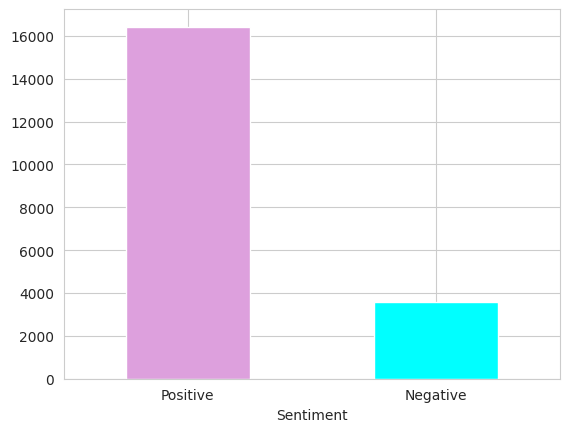

In [57]:
result = df4["Sentiment"].value_counts()

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [58]:
df4.groupby("Sentiment").count()

,post_text,post_text_joined,polarity
Sentiment,,,
Negative,3574,3574,3574
Positive,16426,16426,16426


In [59]:
df4.groupby("polarity").max().head(5) 

,post_text,post_text_joined,Sentiment
polarity,,,
-1.000000,"[worst, bumbling, stumbling, statement, ive, s...",worst bumbling stumbling statement ive seen in...,Negative
-1.000000,"[thebotanophile, jasonmillerindc, realdonaldtr...",thebotanophile jasonmillerindc realdonaldtrump...,Negative
-0.976563,"[the_newright, everyone, knows, false, news, f...",the_newright everyone knows false news fromtnr,Negative
-0.976562,"[politicususa, joe, amp, mika, trump, putin, c...",politicususa joe amp mika trump putin come msn...,Negative
-0.953674,"[really, wan, informed, watch, cbsthismorning,...",really wan informed watch cbsthismorning https...,Negative


In [61]:
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Polarity Distribution')

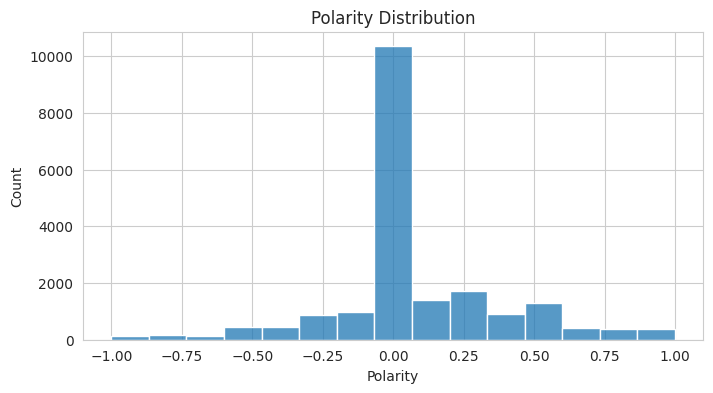

In [62]:
#Visualize distribution of polarity
plt.figure(figsize=(8,4))
sns.histplot(df4['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

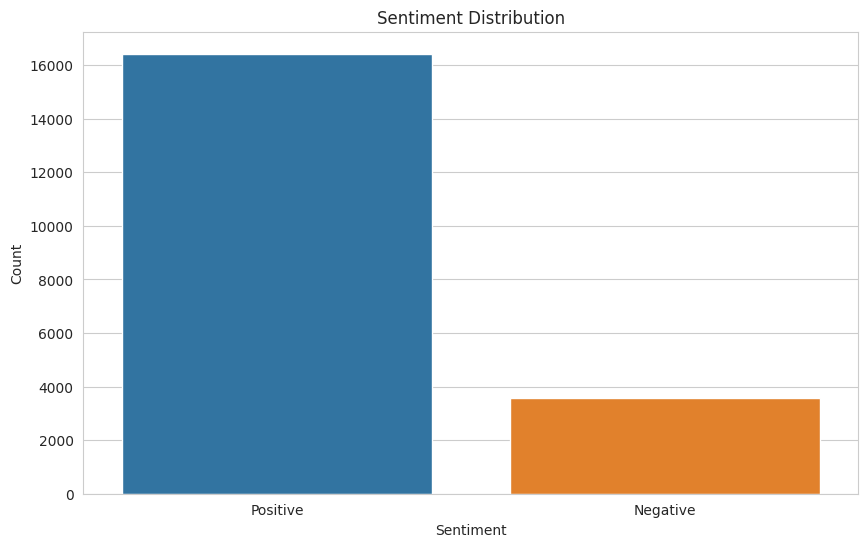

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df4,order=df4['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [66]:
# split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(df4['post_text_joined'], df4['Sentiment'], test_size=0.2, random_state=42)

In [73]:
y_train

5894     Positive
3728     Negative
8958     Positive
7671     Negative
5999     Negative
           ...   
11284    Positive
11964    Negative
5390     Positive
860      Positive
15795    Positive
Name: Sentiment, Length: 16000, dtype: object

In [67]:
# Convert the text data into numerical features using a CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Decision Tree

In [68]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.91375


In [69]:
# Create a classification report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.73      0.82      0.77       711
    Positive       0.96      0.93      0.95      3289

    accuracy                           0.91      4000
   macro avg       0.84      0.88      0.86      4000
weighted avg       0.92      0.91      0.92      4000



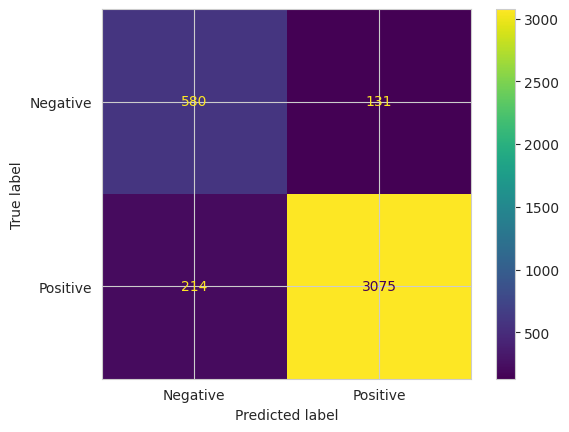

In [70]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [71]:
# Check to see if the decision tree is overfitting or underfitting
print('The training score is',round(clf.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(clf.score(X_test, y_test)*100,2),'%')

The training score is 99.99 %
The testing score is 91.38 %


In [72]:
# check to see if data is balanced
df4['Sentiment'].value_counts()

Sentiment
Positive    16426
Negative     3574
Name: count, dtype: int64

In [87]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_text         20000 non-null  object 
 1   post_text_joined  20000 non-null  object 
 2   polarity          20000 non-null  float64
 3   Sentiment         20000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 625.1+ KB


# Random Forest

# Data Augmentation

In [76]:
!pip install nlpaug
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 3.5 MB/s eta 0:00:00a 0:00:01


In [77]:
import nlpaug.augmenter.word as naw

In [78]:
aug = naw.SynonymAug(aug_src='wordnet', aug_max=3)  # aug_max controls how many words are augmented

In [74]:
# Filter the negative samples
negative_samples = df4[df4['Sentiment'] == 'Negative']

In [81]:
negative_samples.head()

,post_text,post_text_joined,polarity,Sentiment
1,"[sunday, need, break, im, planning, spend, lit...",sunday need break im planning spend little tim...,-0.093750,Negative
2,"[awake, tired, need, sleep, brain, ideas]",awake tired need sleep brain ideas,-0.262500,Negative
4,"[hard, say, whether, packing, lists, making, l...",hard say whether packing lists making life eas...,-0.045833,Negative
6,"[point, keeping, stuff, nostalgic, reasons, cr...",point keeping stuff nostalgic reasons cross li...,-0.153571,Negative
8,"[cant, bothered, cook, take, away, way, lazy]",cant bothered cook take away way lazy,-0.250000,Negative


In [105]:
# Determine how many more samples are needed
n_augmentations = 16000 - 3000  # The difference in class sizes

In [83]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [106]:
# Generate augmented data
augmented_texts = []
for i in tqdm(range(n_augmentations)):
    original_text = negative_samples['post_text_joined'].sample().values[0]  # Randomly pick a negative sample
    augmented_text = aug.augment(original_text)  # Augment the text
#     print(f"main text: {original_text} & aug text: {augmented_text}")
#     break
    augmented_texts.append(augmented_text[0])

100%|██████████| 13000/13000 [00:16<00:00, 766.18it/s]


In [107]:
# Create a DataFrame with the augmented texts
augmented_df = pd.DataFrame({'Sentiment': 'Negative', 'post_text_joined': augmented_texts})

# Append the augmented samples to the original DataFrame
balanced_df = pd.concat([df4, augmented_df], ignore_index=True)

In [108]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_text         20000 non-null  object 
 1   post_text_joined  33000 non-null  object 
 2   polarity          20000 non-null  float64
 3   Sentiment         33000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.0+ MB


In [109]:
print(balanced_df['Sentiment'].value_counts())

Sentiment
Negative    16574
Positive    16426
Name: count, dtype: int64


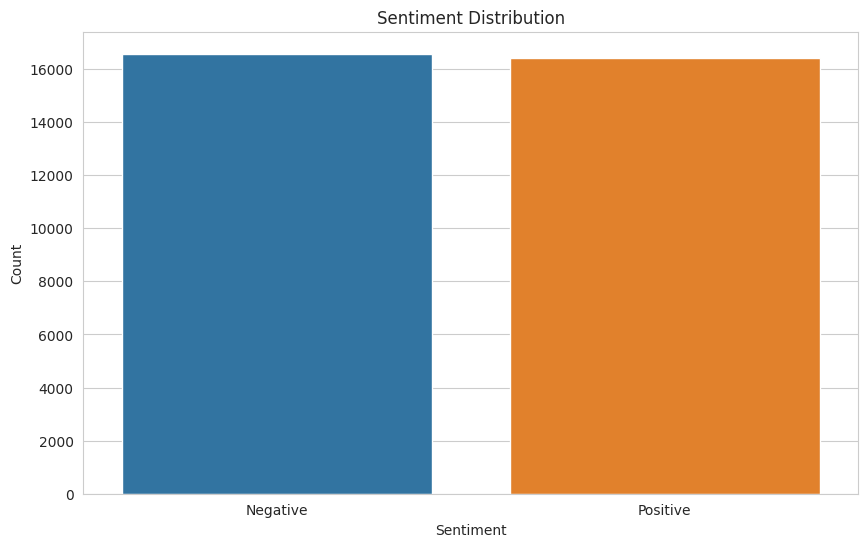

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=balanced_df,order=balanced_df['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [111]:
balanced_df.head()

,post_text,post_text_joined,polarity,Sentiment
0,"[years, since, diagnosed, anxiety, depression,...",years since diagnosed anxiety depression today...,0.100000,Positive
1,"[sunday, need, break, im, planning, spend, lit...",sunday need break im planning spend little tim...,-0.093750,Negative
2,"[awake, tired, need, sleep, brain, ideas]",awake tired need sleep brain ideas,-0.262500,Negative
3,"[rt, sewhq, retro, bears, make, perfect, gifts...",rt sewhq retro bears make perfect gifts great ...,1.000000,Positive
4,"[hard, say, whether, packing, lists, making, l...",hard say whether packing lists making life eas...,-0.045833,Negative


In [98]:
balanced_df.loc[27704]

post_text                                                         NaN
post_text_joined    [rt againstsuicide rent debbie reynolds family...
polarity                                                          NaN
Sentiment                                                    Negative
Name: 27704, dtype: object

In [119]:
balanced_df.to_csv("Twitter_Augmented.csv")

In [112]:
X_train, X_test, y_train, y_test = train_test_split(balanced_df['post_text_joined'],
                                                    balanced_df['Sentiment'],
                                                    test_size=0.2,
                                                    random_state=42)

In [113]:
X_train

7223     new years eve boo boo happynewyear goinghard h...
5196     troyleraholic extroylerverted like almost fami...
6547     rt reiatabie would never cheat relationship wo...
26890    rt nickkristof fake news quondam sham applause...
30152    hey realdonaldtrump suppose something time doe...
                               ...                        
16850                          crying eternity im cf right
6265     larrys_is_real yayyyyyyy harry louis standing ...
11284    rt wallswcst boy got nervous touching arm http...
860                married people better sex httptcoezjvxo
15795                           kimiezulkifli thanks input
Name: post_text_joined, Length: 26400, dtype: object

In [114]:
y_train

7223     Positive
5196     Positive
6547     Positive
26890    Negative
30152    Negative
           ...   
16850    Positive
6265     Negative
11284    Positive
860      Positive
15795    Positive
Name: Sentiment, Length: 26400, dtype: object

# Decision Tree Balanced

In [115]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [116]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
accuracy = clf.score(X_test, y_test)
print('Accuracy for Balanced:', accuracy)

Accuracy for Balanced: 0.9166666666666666


In [117]:
# Create a classification report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.91      0.93      0.92      3344
    Positive       0.93      0.90      0.91      3256

    accuracy                           0.92      6600
   macro avg       0.92      0.92      0.92      6600
weighted avg       0.92      0.92      0.92      6600



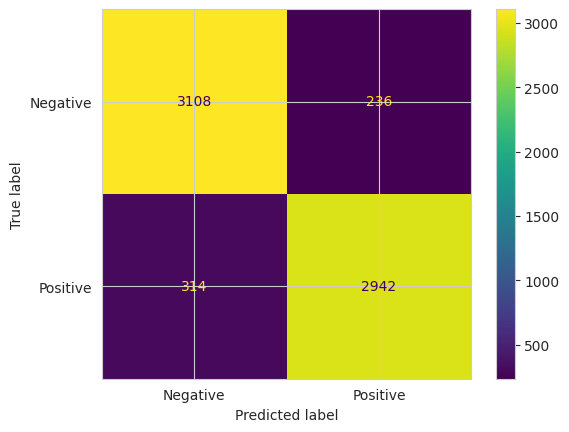

In [118]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# Random Forest Balanced

In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9387878787878788


In [122]:
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(rfc.predict(X_test), y_test)*100,2),'%')

The accuracy of the Random Forest Classifier is 93.88 %


In [123]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.94      0.94      0.94      3344
    Positive       0.94      0.93      0.94      3256

    accuracy                           0.94      6600
   macro avg       0.94      0.94      0.94      6600
weighted avg       0.94      0.94      0.94      6600



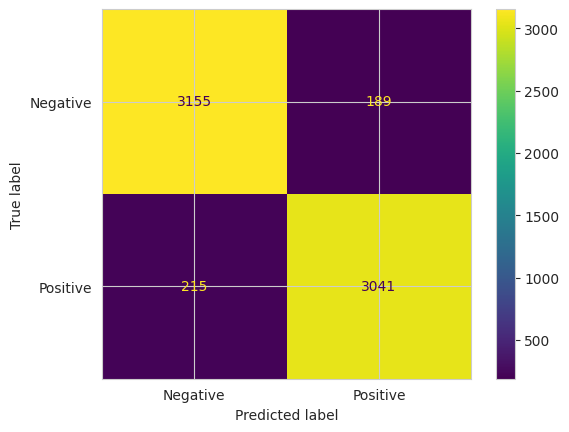

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rfc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

# KNN Balanced

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [126]:
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.86


In [127]:
# Get the accuracy score of the model
print('The accuracy of the KNN Classifier is',round(accuracy_score(knn.predict(X_test), y_test)*100,2),'%')

The accuracy of the KNN Classifier is 86.0 %


In [128]:
# Create a classification report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.92      0.79      0.85      3344
    Positive       0.81      0.93      0.87      3256

    accuracy                           0.86      6600
   macro avg       0.87      0.86      0.86      6600
weighted avg       0.87      0.86      0.86      6600



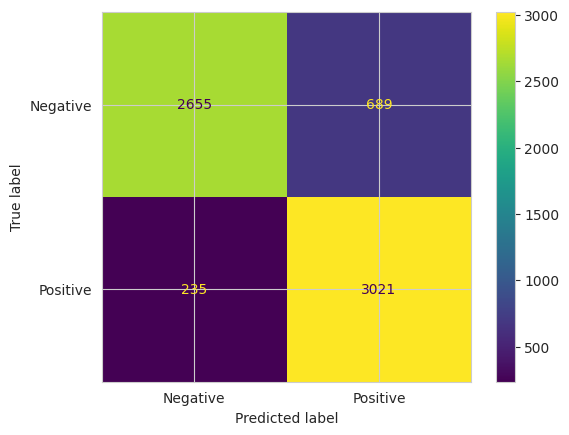

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

## NB Balanced

In [130]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8692424242424243


In [131]:
# Create a classification report
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.81      0.96      0.88      3344
    Positive       0.95      0.77      0.85      3256

    accuracy                           0.87      6600
   macro avg       0.88      0.87      0.87      6600
weighted avg       0.88      0.87      0.87      6600



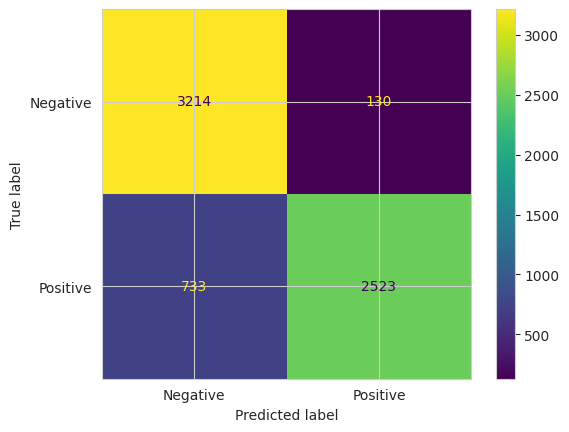

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, nb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()